In [1]:
%matplotlib inline

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

#### Functions used in the study.

In [92]:
# Dataset overview function
def check_df(dataframe, head=5):
    print("######################### SHAPE #########################")
    print(dataframe.shape)
    print("######################### DTYPES #########################")
    print(dataframe.dtypes)
    print("######################### NULL VALUES #########################")
    print(dataframe.isnull().sum())
    print("######################### INFO #########################")
    print(dataframe.info())
    print("######################### HEAD #########################")
    print(dataframe.head(head))
    print("######################### TAIL #########################")
    print(dataframe.tail(head))
    print("######################### DESCRIBE #########################")
    print(dataframe.describe().T)
    
# Check for unique values function
def check_uniques(dataframe):
    for col in dataframe.columns:
        print(' '*20)
        print(col.upper())
        print(dataframe[col].unique())
        
# Plot histogram function
def view_histogram(dataframe, columns = None):    
    num_columns = dataframe.select_dtypes(include=['int64','float64']).columns if columns is None else \
    columns
    
    for col in num_columns:    
        mean_value = dataframe[col]. mean()
        
        plt.figure(figsize=(5,5))
        plt.grid(True)
        plt.title(dataframe[col].name)
        sns.histplot(dataframe[col], kde=True)
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
        plt.legend()
        plt.show()
        
        print('Min:', dataframe[col].min())
        print('Max:', dataframe[col].max())
        print('Mean:', mean_value)
        print('Std:', dataframe[col].std())
        print('Skewness:', dataframe[col].skew())
        print('Kurtosis', dataframe[col].kurt())

# Show countplot function        
def show_countplot(dataframe, feature):
    plt.figure(figsize=(15,4))
    total = float(len(dataframe))
    countplot = sns.countplot(x=feature, data=dataframe)
    for p in countplot.patches:
        height = p.get_height()
        countplot.text(p.get_x()+p.get_width()/2.,
                height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

# Adult Income Dataset

## Exploratory and Data Analysis

In [3]:
adult_income = pd.read_csv('data/adult.csv')

In [113]:
adult_income

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [89]:
print('Adult Income dataset overview\n')
check_df(adult_income)

Adult Income dataset overview

######################### SHAPE #########################
(48842, 15)
######################### DTYPES #########################
age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object
######################### NULL VALUES #########################
age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64
######################### INFO #############

In [90]:
# Rename the columns contains '-'
adult_income.columns = [col.replace('-', '_') for col in adult_income.columns]

In [91]:
print('Check for unique values')
check_uniques(adult_income)

Check for unique values
                    
AGE
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
                    
WORKCLASS
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
                    
FNLWGT
[226802  89814 336951 ... 129912 255835 257302]
                    
EDUCATION
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
                    
EDUCATIONAL_NUM
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
                    
MARITAL_STATUS
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
                    
OCCUPATION
['Machine-op-inspct' 'Far

### Cleaning dataset

In three features - workclass, occupation, and native_country - there are values '?'.

In [162]:
rows_with_questionmark = adult_income[adult_income.apply(lambda row: '?' in row.values, axis=1)]

In [163]:
round(len(rows_with_questionmark)/len(adult_income)*100, 4)

7.4117

There are 7.4117 percent with '?' symbols as values. The dataset is large enough, so we can remove these rows.

In [164]:
# Replace '?' with 'NaN'
clean_adult_income = adult_income.replace('?',pd.NA,)

In [165]:
clean_adult_income.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational_num       0
marital_status        0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
income                0
dtype: int64

In [166]:
# Remove 'NaN' values from dataset
clean_adult_income.dropna(inplace = True)

In [167]:
clean_adult_income.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [168]:
clean_adult_income.shape

(45222, 15)

###  Extracting interesting information from the dataset.

In [696]:
clean_adult_income.native_country.value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [707]:
'Percentage of United-States population overall', round(clean_adult_imcome.native_country.value_counts()[0]/clean_adult_income.shape[0]*100,2)

('Percentage of United-States population overall', 91.31)

More than 90 percent of the respondents in this dataset are Americans around the year 1996. This should be taken into account in the analyses below.

#### Age

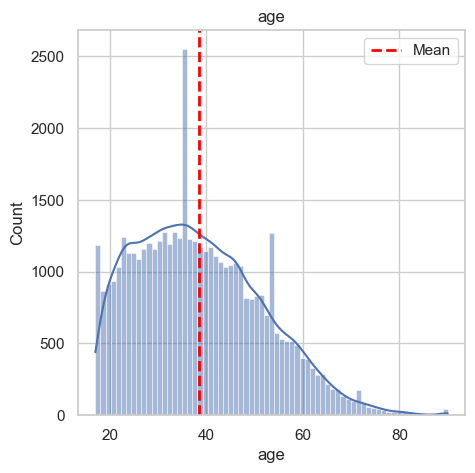

Min: 17
Max: 90
Mean: 38.547941267524656
Std: 13.217870219055524
Skewness: 0.5328158942555791
Kurtosis -0.15587445202596317


In [169]:
# View age histogram of the cleaned dataset
view_histogram(clean_adult_imcome, columns=['age'])

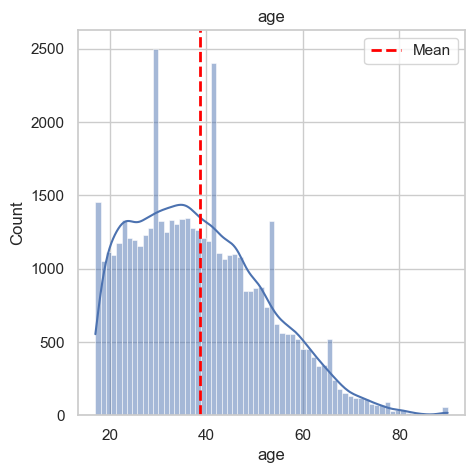

Min: 17
Max: 90
Mean: 38.64358543876172
Std: 13.71050993444322
Skewness: 0.5575803166133181
Kurtosis -0.18426874062387766


In [170]:
# View age histogram of the original dataset
view_histogram(adult_income, columns=['age'])

The comparison between the original and cleaned dataset shows insignificant statistical differences.

In [171]:
# Splitting the data by the mean value.
mean_age = clean_adult_imcome['age'].mean()
below_mean_age = clean_adult_imcome[clean_adult_imcome['age'] < mean_age]
above_mean_age = clean_adult_imcome[clean_adult_imcome['age'] > mean_age]

print('Number of people:')
print('Below mean age ->', len(below_mean_age))
print('Above mean age ->', len(above_mean_age))
print('Ratio ->', len(below_mean_age)/len(above_mean_age))

Number of people:
Below mean age -> 24238
Above mean age -> 20984
Ratio -> 1.1550705299275639


More (around 15.5%) of the working individuals are below the average age.

The distribution has a slight positive skewness, despite the fact that most of the workers are below the average age. This is due to the presence of a certain portion of workers who are in the age range of 60 to 90 years.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


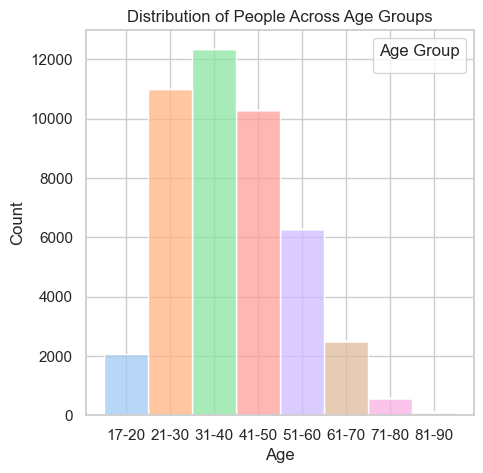

In [172]:
bins = [17, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90',]

sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.histplot(data=clean_adult_imcome, x=pd.cut(clean_adult_imcome['age'], bins=bins, labels=labels, right=False), hue=pd.cut(adult_income['age'], bins=bins, labels=labels, right=False), multiple="stack", palette="pastel")

plt.legend(title='Age Group')
plt.title('Distribution of People Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

The majority of the working population is between 20 and 60 years old.

#### Age - Income analysis

In [210]:
# Change the first value in the list from 17 to 16 
bins = [16, 20, 30, 40, 50, 60, 70, 80, 90]

ages_counts_income = {'Age': [], '<=50K': [],'>50K': []}

for i in range(len(labels)):
    down_limit_age, upper_limit_age = bins[i], bins[i+1]
    label = labels[i]
    ages_counts_income['Age'].append(label)
    
    for column in clean_adult_income.income.unique():
        age_group_count = len(clean_adult_income.loc[(clean_adult_income.age>down_limit_age) & (clean_adult_income.age<=upper_limit_age) & \
                                                   (clean_adult_income.income ==column)])
        ages_counts_income[column].append(age_group_count)

ages_counts_income = pd.DataFrame(ages_counts_income)
ages_counts_income

,Age,<=50K,>50K
0,17-20,2965,3
1,21-30,10331,961
2,31-40,8785,3506
3,41-50,6131,3859
4,51-60,3664,2169
5,61-70,1628,584
6,71-80,419,103
7,81-90,91,23


In [218]:
ages_counts_income.describe().T

,count,mean,std,min,25%,50%,75%,max
<=50K,8.0,4251.75,3815.874165,91.0,1325.75,3314.5,6794.50,10331.0
>50K,8.0,1401.00,1579.411916,3.0,83.00,772.5,2503.25,3859.0


In [214]:
ages_counts_income['<=50K'].sum(),ages_counts_income['>50K'].sum()

(34014, 11208)

In [217]:
round(ages_counts_income['<=50K'].sum()/len(clean_adult_income)*100, 2),  round(ages_counts_income['>50K'].sum()/len(clean_adult_income)*100, 2)

(75.22, 24.78)

Three-quarters of people earn less or equal to 50,000.

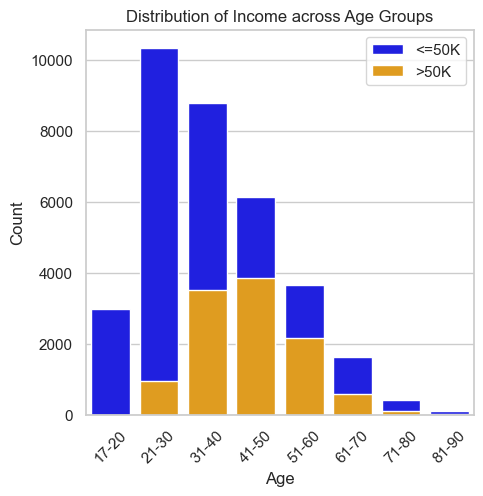

In [301]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Age', y='<=50K', data=ages_counts_income, color='blue', label='<=50K')

sns.barplot(x='Age', y='>50K', data=ages_counts_income, color='orange', label='>50K')

plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Income across Age Groups')
plt.legend()
plt.show()

In [313]:
print('Percentage distribution of incomes by age group.')

print('Age', ' ' * 6, 'Total people count', ' ' * 6, '<=50K', ' ' * 6, '>50K')
for i in range(len(ages_counts_income.Age)):
    
    below = ages_counts_income['<=50K'][i]
    above = ages_counts_income['>50K'][i]
    total_people = below + above
    age_group = ages_counts_income['Age'][i]
    print(age_group,' ' * 5, total_people,' ' * 18,  round(below/total_people*100, 2),'%',' ' * 5,  round(above/total_people*100, 2), '%')

Percentage distribution of incomes by age group.
Age        Total people count        <=50K        >50K
17-20       2968                    99.9 %       0.1 %
21-30       11292                    91.49 %       8.51 %
31-40       12291                    71.48 %       28.52 %
41-50       9990                    61.37 %       38.63 %
51-60       5833                    62.82 %       37.18 %
61-70       2212                    73.6 %       26.4 %
71-80       522                    80.27 %       19.73 %
81-90       114                    79.82 %       20.18 %


As seen from the barchart and the percentage breakdown of incomes by age group, in all age groups, the majority of people earn less than or equal to 50,000. It is evident that the percentage of high income is lowest in the 17 to 30 age range and highest between the ages of 31 and 60. This makes sense - as individuals age, it is normal for their incomes to increase due to accumulated experience, on one hand, and their significant workforce capability, in other hand. This percentage remains relatively high - around 20 percent - even in advanced age (60 years and above), despite the drastic decrease in the number of working individuals in this age group after the age of 60. Additionally, it can be observed that the highest employment rate for individuals is between 21 and 40 years old, gradually declining afterward.

#### Age - Gender analysis

In [268]:
grouped_data = clean_adult_income.groupby('gender').agg({'age': ['count', 'mean']}).reset_index()
print(grouped_data.sort_values(by=('age','mean'), ascending=False))

   gender    age           
           count       mean
1    Male  30527  39.300423
0  Female  14695  36.984757


In [304]:
# Original dataset value counts by gender
adult_income.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

The male-to-female ratio does not show a significant change after reducing the dataset by 7 percent.

In [286]:
males_count = grouped_data.loc[grouped_data['gender'] == 'Male', ('age', 'count')].values[0]
females_count = grouped_data.loc[grouped_data['gender'] == 'Female', ('age', 'count')].values[0]
total = males_count + females_count

In [288]:
round(females_count/total*100), round(males_count/total*100)

(32, 68)

Just over two-thirds of the workforce are men, with their average age slightly higher compared to that of women. Possible explanations include: the dataset's composition being primarily composed of interviews with men (relying on the traditional male role of working and earning money); later retirement age for men (Without having data that this is the prevailing retirement age condition, but the higher average age of working men supports such an assumption. In addition, since the majority of the data in this dataset is collected in the United States, they should have the greatest influence. On average, women in the United States retire earlier than men.); greater involvement of women in caregiving responsibilities for children during certain periods of their lives, etc.

In [295]:
ages_counts_gender = {'Age': [], 'Male': [],'Female': []}

for i in range(len(labels)):
    down_limit_age, upper_limit_age = bins[i], bins[i+1]
    label = labels[i]
    ages_counts_gender['Age'].append(label)
    
    for column in clean_adult_income.gender.unique():
        age_group_count = len(clean_adult_income.loc[(clean_adult_income.age>down_limit_age) & (clean_adult_income.age<=upper_limit_age) & \
                                                   (clean_adult_income.gender ==column)])
        ages_counts_gender[column].append(age_group_count)

ages_counts_gender = pd.DataFrame(ages_counts_gender)
ages_counts_gender

,Age,Male,Female
0,17-20,1530,1438
1,21-30,7078,4214
2,31-40,8695,3596
3,41-50,7112,2878
4,51-60,4189,1644
5,61-70,1507,705
6,71-80,337,185
7,81-90,79,35


In [296]:
ages_counts_gender.describe().T

,count,mean,std,min,25%,50%,75%,max
Male,8.0,3815.875,3424.156140,79.0,1214.5,2859.5,7086.5,8695.0
Female,8.0,1836.875,1571.263044,35.0,575.0,1541.0,3057.5,4214.0


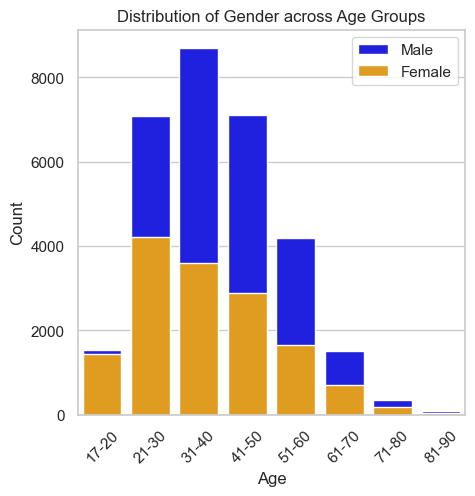

In [451]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Age', y='Male', data=ages_counts_gender, color='blue', label='Male')

sns.barplot(x='Age', y='Female', data=ages_counts_gender, color='orange', label='Female')

plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Gender across Age Groups')
plt.legend()
plt.show()

Here, a clear trend is evident - in the working-age range of 21-60, the majority of the workforce is comprised of men. The working age largely coincides with the fertile age range for women, 17-50. It is likely that all the factors mentioned above, and many others for sure, have an impact on this result.

#### Age - Education analysis

In [556]:
ages_counts_education = {'Age': []}

# Create key-value pairs in ages_count_education dictionary
for degree in clean_adult_income.education.unique():
    if degree not in ages_counts_education.keys():
        ages_counts_education[degree] = []
        

for i in range(len(labels)):
    down_limit_age, upper_limit_age = bins[i], bins[i+1]
    label = labels[i]
    ages_counts_education['Age'].append(label)
    
    for column in clean_adult_income.education.unique():
        age_group_count = len(clean_adult_income.loc[(clean_adult_income.age>down_limit_age) & (clean_adult_income.age<=upper_limit_age) & \
                                                   (clean_adult_income.education ==column)])
        ages_counts_education[column].append(age_group_count)

ages_counts_education = pd.DataFrame(ages_counts_education)
ages_counts_education.columns = [col.replace('-', '_') for col in ages_counts_education.columns]
ages_counts_education

,Age,11th,HS_grad,Assoc_acdm,Some_college,10th,Prof_school,7th_8th,Bachelors,Masters,5th_6th,Assoc_voc,9th,Doctorate,12th,1st_4th,Preschool
0,17-20,542,874,15,992,226,0,25,2,2,18,16,69,0,179,4,4
1,21-30,337,3684,419,2938,244,78,107,2208,294,100,538,145,28,124,31,17
2,31-40,302,4203,526,2436,256,230,130,2312,683,87,654,155,133,116,51,17
3,41-50,205,2995,363,2031,162,272,163,1884,920,103,467,103,191,65,54,12
4,51-60,148,2067,139,1043,211,121,189,800,451,86,204,130,126,59,47,12
5,61-70,65,758,40,360,99,58,138,296,133,37,64,58,49,27,23,7
6,71-80,16,169,2,82,21,19,58,52,23,16,15,14,17,6,9,3
7,81-90,4,33,3,17,4,7,13,16,8,2,1,2,0,1,3,0


In [557]:
# Combine and reduce columns
ages_counts_education['No_HS_grad'] = ages_counts_education[['Preschool', '1st_4th', '5th_6th', '7th_8th', '9th', '10th', '11th', '12th']].sum(axis=1)
ages_counts_education['Associate_degree'] = ages_counts_education[['Assoc_acdm', 'Assoc_voc']].sum(axis=1)
ages_counts_education['HS_grad'] = ages_counts_education[['Prof_school', 'HS_grad']].sum(axis=1)

ages_counts_education.drop(columns=['Preschool', '1st_4th', '5th_6th', '7th_8th', '9th', '10th', '11th', '12th','Assoc_acdm', 'Assoc_voc','Prof_school'], inplace=True)

ages_counts_education

,Age,HS_grad,Some_college,Bachelors,Masters,Doctorate,No_HS_grad,Associate_degree
0,17-20,874,992,2,2,0,1067,31
1,21-30,3762,2938,2208,294,28,1105,957
2,31-40,4433,2436,2312,683,133,1114,1180
3,41-50,3267,2031,1884,920,191,867,830
4,51-60,2188,1043,800,451,126,882,343
5,61-70,816,360,296,133,49,454,104
6,71-80,188,82,52,23,17,143,17
7,81-90,40,17,16,8,0,29,4


The following is a breakdown of educational degrees by age groups.

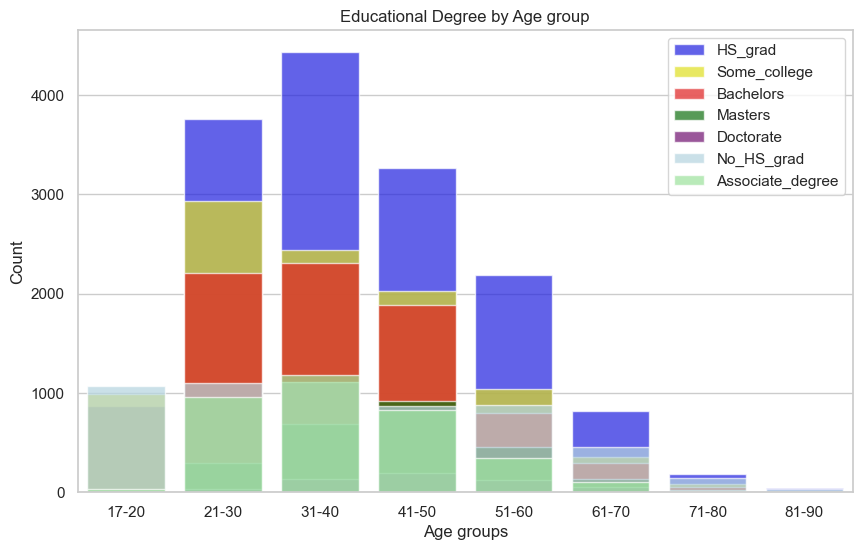

In [560]:
plt.figure(figsize=(10, 6))

colors = iter(['blue', 'yellow', 'red', 'green', 'purple', 'lightblue', 'lightgreen', 'grey'])

for degree in ages_counts_education.drop(columns=['Age']).columns.unique():
    sns.barplot(x = 'Age', y = ages_counts_education[degree], data=ages_counts_education, label = degree, color = next(colors), alpha = 0.7)
plt.legend()
plt.title('Educational Degree by Age group')
plt.xlabel('Age groups')
plt.ylabel('Count')
plt.show()


In [568]:
ages_counts_education_by_groups = ages_counts_education.iloc[:, 1:].div(total_people, axis=0) * 100
ages_counts_education_by_groups.insert(0, 'Age', ages_counts_education.Age)
ages_counts_education_by_groups

,Age,HS_grad,Some_college,Bachelors,Masters,Doctorate,No_HS_grad,Associate_degree
0,17-20,1.932688,2.193623,0.004423,0.004423,0.000000,2.359471,0.068551
1,21-30,8.318960,6.496838,4.882579,0.650126,0.061917,2.443501,2.116227
2,31-40,9.802751,5.386759,5.112556,1.510327,0.294105,2.463403,2.609349
3,41-50,7.224360,4.491177,4.166114,2.034408,0.422361,1.917208,1.835390
4,51-60,4.838353,2.306400,1.769050,0.997302,0.278625,1.950378,0.758480
5,61-70,1.804431,0.796073,0.654549,0.294105,0.108354,1.003936,0.229977
6,71-80,0.415727,0.181328,0.114988,0.050860,0.037592,0.316218,0.037592
7,81-90,0.088453,0.037592,0.035381,0.017691,0.000000,0.064128,0.008845


In [562]:
ages_counts_education_by_groups.describe().T

,count,mean,std,min,25%,50%,75%,max
HS_grad,8.0,4.303215,3.778334,0.088453,1.457255,3.385520,7.498010,9.802751
Some_college,8.0,2.736224,2.458248,0.037592,0.642386,2.250011,4.715072,6.496838
Bachelors,8.0,2.092455,2.263999,0.004423,0.095086,1.211800,4.345230,5.112556
Masters,8.0,0.694905,0.761901,0.004423,0.042568,0.472115,1.125558,2.034408
Doctorate,8.0,0.150369,0.159740,0.000000,0.028194,0.085136,0.282495,0.422361
No_HS_grad,8.0,1.564780,0.971708,0.064128,0.832007,1.933793,2.380479,2.463403
Associate_degree,8.0,0.958051,1.065515,0.008845,0.060811,0.494228,1.905599,2.609349


Most people have completed school, college, or hold a bachelor's degree. This indicates a good level of education among the working population, but it should be noted that, due to the largest share of interviewed citizens in the USA, this chart is largely influenced by the educational status of their population. People who have not completed high school education are twice as many as those who have completed a doctorate or master's degree. 

There is a clear trend indicating that the new generations are more inclined to pursue education. At the same time, the percentage of people without completed secondary education does not change significantly with the shift in generations - remaining around 2 percent through generations. There is also a strong tendency for an increase in individuals who have completed a two-year college degree. The lower levels of education among older generations - above the age of 60 - may be partially explained by higher mortality rates in these age groups, but only to some extent. Mortality affects all individuals equally, and therefore, it cannot be expected to significantly influence the percentage distribution.

#### Age - Marital status analysis

In [681]:
clean_adult_income.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [682]:
ages_count_marital = {'Age': []}
# Create key-value pairs in ages_count_marital dictionary
for degree in clean_adult_income.marital_status.unique():
    if degree not in ages_count_marital.keys():
        ages_count_marital[degree] = []
        

for i in range(len(labels)):
    down_limit_age, upper_limit_age = bins[i], bins[i+1]
    label = labels[i]
    ages_count_marital['Age'].append(label)
    
    for column in clean_adult_income.marital_status.unique():
        age_group_count = len(clean_adult_income.loc[(clean_adult_income.age>down_limit_age) & (clean_adult_income.age<=upper_limit_age) & \
                                                   (clean_adult_income.marital_status ==column)])
        ages_count_marital[column].append(age_group_count)

ages_count_marital = pd.DataFrame(ages_count_marital)
ages_count_marital.columns = [col.replace('-', '_') for col in ages_count_marital.columns]
ages_count_marital

,Age,Never_married,Married_civ_spouse,Widowed,Separated,Divorced,Married_spouse_absent,Married_AF_spouse
0,17-20,2850,74,0,13,17,11,3
1,21-30,7168,3009,19,276,678,126,16
2,31-40,2931,6623,76,502,1997,152,10
3,41-50,1084,5985,207,398,2159,155,2
4,51-60,389,3697,390,181,1101,74,1
5,61-70,121,1342,394,37,295,23,0
6,71-80,33,273,160,3,43,10,0
7,81-90,22,52,31,1,7,1,0


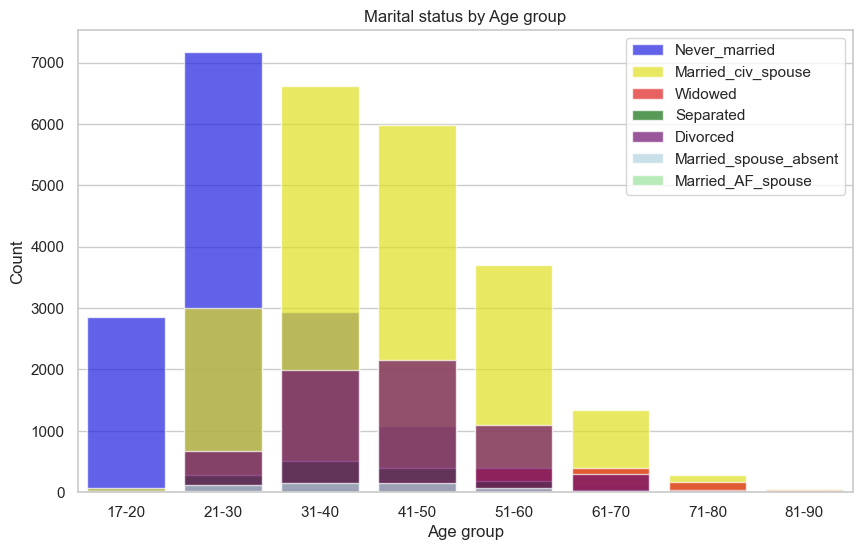

,Age,Never_married,Married_civ_spouse,Widowed,Separated,Divorced,Married_spouse_absent,Married_AF_spouse
0,17-20,96.024259,2.493261,0.000000,0.438005,0.572776,0.370620,0.101078
1,21-30,63.478569,26.647184,0.168261,2.444208,6.004251,1.115834,0.141693
2,31-40,23.846717,53.884956,0.618339,4.084289,16.247661,1.236677,0.081360
3,41-50,10.850851,59.909910,2.072072,3.983984,21.611612,1.551552,0.020020
4,51-60,6.668953,63.380765,6.686096,3.103034,18.875364,1.268644,0.017144
5,61-70,5.470163,60.669078,17.811935,1.672694,13.336347,1.039783,0.000000
6,71-80,6.321839,52.298851,30.651341,0.574713,8.237548,1.915709,0.000000
7,81-90,19.298246,45.614035,27.192982,0.877193,6.140351,0.877193,0.000000


In [688]:
plt.figure(figsize=(10, 6))

colors = iter(['blue', 'yellow', 'red', 'green', 'purple', 'lightblue', 'lightgreen'])

for m_status in ages_count_marital.drop(columns=['Age']).columns.unique():
    sns.barplot(x = 'Age', y = ages_count_marital[m_status], data=ages_count_marital, label = m_status, color = next(colors), alpha = 0.7)
plt.legend()
plt.title('Marital status by Age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()

total_people_age_group = ages_count_marital.iloc[:, 1:].sum(axis=1)
percentage_marital_by_group = ages_count_marital.iloc[:, 1:].div(total_people_age_group, axis=0) * 100
percentage_marital_by_group.insert(0, 'Age', ages_count_marital.Age)
percentage_marital_by_group

These data reveal interesting patterns. Understandably, the highest percentage of unmarried individuals is in the age range between 17 and 30 years. Since more than 90 percent of the respondents are residents of the USA, this statistic reflects the trend among young people there, which is likely valid for Western civilizations in general—prioritizing personal development, acquiring education, and pursuing career success over early marriage. As age progresses, this percentage shows a strong tendency to decrease—from 96% in the range up to 20 years old to 6.67% between 51 and 60 years old. Logically, the percentage of married individuals starts to significantly increase from the age of 21, peaking in the range of 31 to 40. This also affirms the trend that, after completing their education and somewhat concurrently with their professional development, people increasingly focus on starting a family.

In parallel with the increase in marriages, there is also an observed rise in divorces in the years after 21, with their peak occurring between 41 and 50 years old. There are at least two probable reasons—one being that in this age range, the couple's children have likely grown up and taken their own path, meaning one of the main reasons for entering and sustaining a marriage diminishes. The other reason is that at this age, individuals more frequently reflect on and reassess their lives, including their relationships with their marital partners.

The percentage of separated couples, i.e., those who are married but live separately, doesn't undergo significant changes and remains at low percentages around 3-4%. These individuals are likely unwilling to engage in the difficulties associated with divorce proceedings.

The percentage of widowed individuals sees a substantial increase only after the age of 51, reaching its highest values after 71 years. This coincides with the average life expectancy.